# Array and Plots

In [7]:
# array type and vectorized functions
import numpy as np
import numpy.typing as npt

# plotting
import matplotlib.pyplot as plt

## numpy arrays

create the points for a function
>f(x) = x^2

5 points in [0,1]

In [2]:
f = lambda x : (x * x)

n = 5
dx = 1.0 / (n - 1)

### from python lists

In [3]:
x_arr = np.array([(x*dx) for x in range(n)])
y_arr = np.array([f(x) for x in x_arr])

### direct creation

In [4]:
# places n points in [0,1]
x_arr = np.linspace(0, 1, n)  

# zero initialized array with len=n
y_arr = np.zeros(n)           
for idx, val in enumerate(x_arr):
    y_arr[idx] = f(val)

# faster way to create y_arr
y_arr2 = f(x_arr)

In [5]:
def print_points(x_arr:npt.ArrayLike, y_arr:npt.ArrayLike) -> None:
    for ind, (x, y) in enumerate(zip(x_arr, y_arr)):
        print(f"x[{ind}] = {x:>7.6f}\ty[{ind}] = {y:>7.6f}")

print_points(x_arr, y_arr)

x[0] = 0.000000	y[0] = 0.000000
x[1] = 0.250000	y[1] = 0.062500
x[2] = 0.500000	y[2] = 0.250000
x[3] = 0.750000	y[3] = 0.562500
x[4] = 1.000000	y[4] = 1.000000


## Vectorized Functions

Example function:
> **f (x) = (e^(−x)) * sin(2πx)**

To write a vectorized function only use:

* basic operators (+ - * / **)
* np.operators
* np.constants

*vectorized functions work on numpy arrays (as well as on scalars)*

In [6]:
def f(x:npt.ArrayLike) -> npt.ArrayLike:
    """f is implemented as a vectorized function"""
    return (np.exp(-x)) * np.sin(2 * np.pi * x)

n = 10
x = np.linspace(0,4,n)
y = f(x)

print_points(x,y)


x[0] = 0.000000	y[0] = 0.000000
x[1] = 0.444444	y[1] = 0.219297
x[2] = 0.888889	y[2] = -0.264258
x[3] = 1.333333	y[3] = 0.228282
x[4] = 1.777778	y[4] = -0.166446
x[5] = 2.222222	y[5] = 0.106722
x[6] = 2.666667	y[6] = -0.060174
x[7] = 3.111111	y[7] = 0.028637
x[8] = 3.555556	y[8] = -0.009770
x[9] = 4.000000	y[9] = -0.000000


## Plotting

Example function:
> **f (x) = (e^(−x)) * sin(2πx)** for x ∈ [0, 4]*

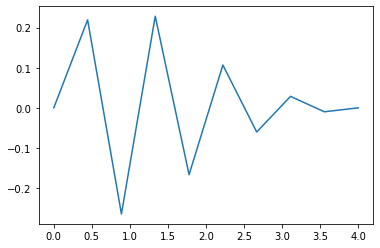

In [8]:
plt.plot(x, y)

**Book**: Introduction to scientific programming  
**Page**: 86